In [1]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Quantum_Test/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

train_path = '/content/drive/MyDrive/Quantum_Test/train.csv'
test_path = '/content/drive/MyDrive/Quantum_Test/hidden_test.csv'

data = pd.read_csv(train_path)
display(data.head())

# data['6_8_combined'] = (data['6'] + data['8']) / 2
# data = data.drop(columns=['6', '8'])

scaler = StandardScaler()
features = data.drop(columns=['target'])
features_scaled = scaler.fit_transform(features)

# pca = PCA(n_components=0.95)
# features_pca = pca.fit_transform(features_scaled)

data_processed = pd.DataFrame(features_scaled)
data_processed['target'] = data['target']

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
data_sourse = data_processed[:10000]
X = data_sourse.drop(columns=['target'])
y = data_sourse['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8000, 53)
y_train shape: (8000,)
X_test shape: (2000, 53)
y_test shape: (2000,)


RandomForest RMSE: 0.05317089376757114
LinearRegression RMSE: 29.47872470482591
DecisionTree RMSE: 0.06626131626287059
GradientBoosting RMSE: 0.4336052278581536
SVR RMSE: 28.950358259707347
KNN RMSE: 30.39604472572086


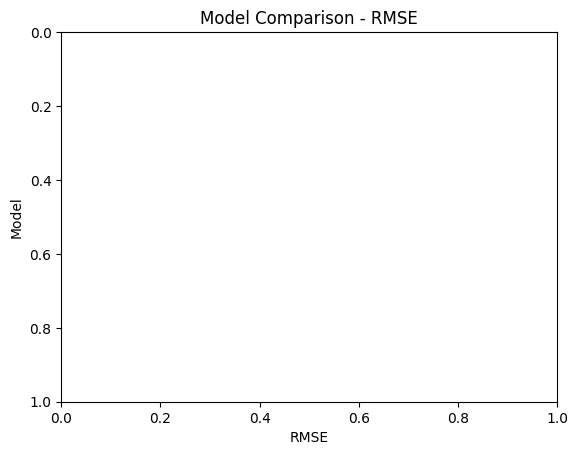

In [4]:

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

performance_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    performance_metrics[name] = rmse
    print(f"{name} RMSE: {rmse}")

plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison - RMSE')
plt.gca().invert_yaxis()
plt.show()


In [5]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=rf_param_grid,
                                      n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

gb_random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                      param_distributions=gb_param_grid,
                                      n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_
best_gb = gb_random_search.best_estimator_

print(f"Best Random Forest Parameters: {rf_random_search.best_params_}")
print(f"Best Gradient Boosting Parameters: {gb_random_search.best_params_}")

rf_pred = best_rf.predict(X_test)
gb_pred = best_gb.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)

print(f"Best Random Forest RMSE: {rf_rmse}")
print(f"Best Gradient Boosting RMSE: {gb_rmse}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best Gradient Boosting Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
Best Random Forest RMSE: 0.05215619272322973
Best Gradient Boosting RMSE: 0.031472940691017526


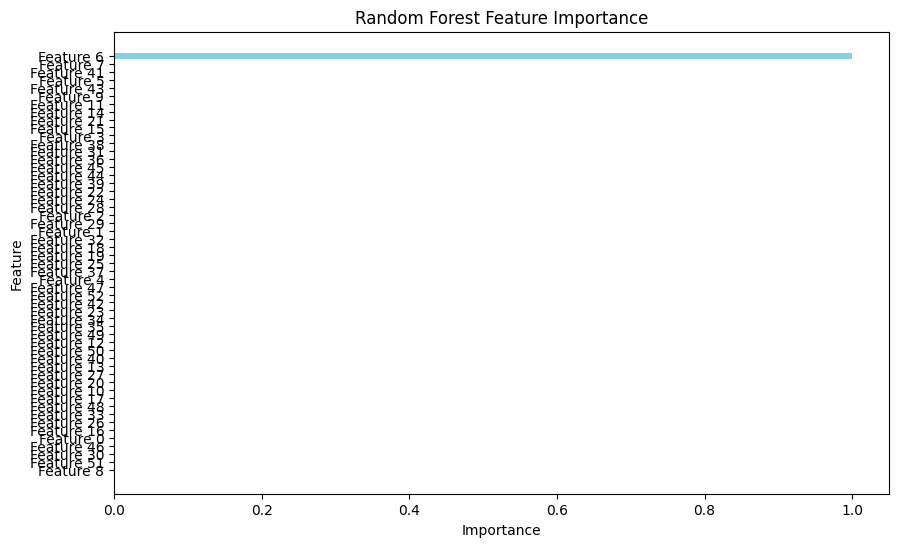

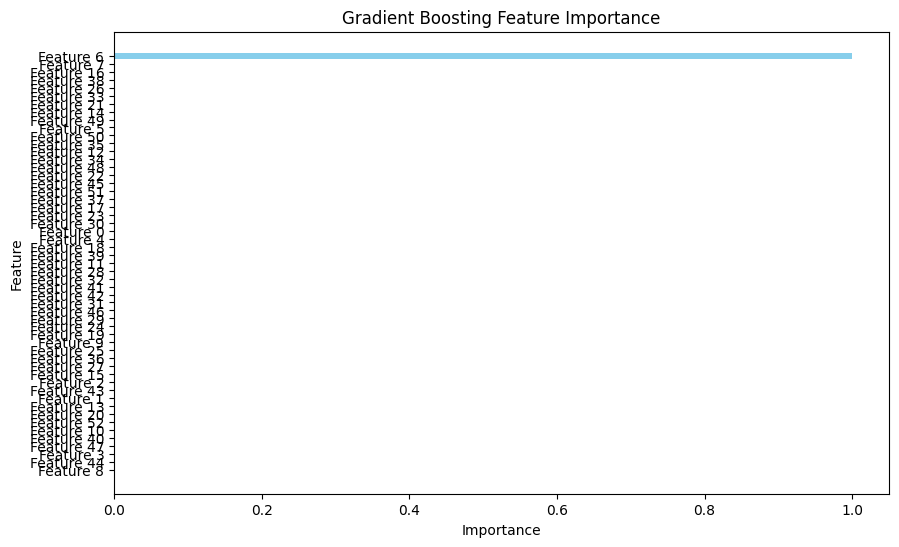

In [9]:
# Feature importance for Random Forest
rf_feature_importances = best_rf.feature_importances_
rf_feature_names = [f'Feature {i}' for i in range(len(rf_feature_importances))]
rf_importance_df = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Feature importance for Gradient Boosting
gb_feature_importances = best_gb.feature_importances_
gb_feature_names = [f'Feature {i}' for i in range(len(gb_feature_importances))]
gb_importance_df = pd.DataFrame({
    'Feature': gb_feature_names,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(gb_importance_df['Feature'], gb_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [13]:
# -1 it's target
top_features = [6, 7, -1]


data_sourse = data_processed[:10000]
data_sourse = data_sourse.iloc[:, top_features]

X = data_sourse.drop(columns=['target'])
y = data_sourse['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)




# Best Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
# Best Gradient Boosting Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
# Best Random Forest RMSE: 0.05215619272322973
# Best Gradient Boosting RMSE: 0.031472940691017526


rf_model = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30, bootstrap=True, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_depth=5, learning_rate=0.2, random_state=42)


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")

X_train shape: (8000, 2)
y_train shape: (8000,)
X_test shape: (2000, 2)
y_test shape: (2000,)
Random Forest RMSE: 0.017333510211248848
Gradient Boosting RMSE: 0.03478500569430844


In [15]:
# -1 it's target
top_features = [6, 7, -1]


data_sourse = data_processed
data_sourse = data_sourse.iloc[:, top_features]

X = data_sourse.drop(columns=['target'])
y = data_sourse['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)




# Best Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
# Random Forest RMSE: 0.017333510211248848


final_model = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30, bootstrap=True, random_state=42)


final_model.fit(X_train, y_train)

final_pred = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_pred, squared=False)

print(f"Random Forest RMSE: {final_rmse}")

X_train shape: (72000, 2)
y_train shape: (72000,)
X_test shape: (18000, 2)
y_test shape: (18000,)
Random Forest RMSE: 0.0015879719256077331


In [17]:
import joblib

model_filename = 'final_random_forest_model.joblib'
joblib.dump(final_model, model_filename)
print(f"Model saved as {model_filename}")

loaded_model = joblib.load(model_filename)

loaded_pred = loaded_model.predict(X_test)
loaded_rmse = mean_squared_error(y_test, loaded_pred, squared=False)
print(f"Loaded model RMSE: {loaded_rmse}")

Model saved as final_random_forest_model.joblib
Loaded model RMSE: 0.0015879719256077331
